<a href="https://colab.research.google.com/github/abhinavkumar17/Machine-Learnings/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
with open('content.json') as content:
  data1 = json.load(content)

In [3]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [4]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [5]:
#printing the data
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,"hi, is this is the pirate's organization",greeting
4,any pirates here ?,greeting
...,...,...
76,tell me more about the pre requisites,prerequisites
77,give more details about the pre-requisites,prerequisites
78,What are the requirements,prerequisites
79,what's the basic requirements,prerequisites


In [7]:
data = data.sample(frac=1)
data

,inputs,tags
42,what can I call you ?,whoareyou
53,where are you currently at,whereareyou
41,are you a chatbot ?,whoareyou
18,byr bro,goodbye
43,your name ?,whoareyou
...,...,...
73,what are the pre requisites ?,prerequisites
23,i will catch you later,goodbye
25,okay i will see you later,goodbye
60,How to join the strawhats ?,join


In [8]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
42,what can i call you,whoareyou
53,where are you currently at,whereareyou
41,are you a chatbot,whoareyou
18,byr bro,goodbye
43,your name,whoareyou
...,...,...
73,what are the pre requisites,prerequisites
23,i will catch you later,goodbye
25,okay i will see you later,goodbye
60,how to join the strawhats,join


In [9]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [10]:
input_shape = x_train.shape[1]
print(input_shape)

8


In [11]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  96
output length:  8


In [12]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [13]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [14]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
3/3 [==============================] - 2s 7ms/step - loss: 2.0746 - accuracy: 0.2188
Epoch 2/200
3/3 [==============================] - 0s 6ms/step - loss: 2.0707 - accuracy: 0.2065
Epoch 3/200
3/3 [==============================] - 0s 6ms/step - loss: 2.0660 - accuracy: 0.2384
Epoch 4/200
3/3 [==============================] - 0s 6ms/step - loss: 2.0647 - accuracy: 0.2016
Epoch 5/200
3/3 [==============================] - 0s 6ms/step - loss: 2.0572 - accuracy: 0.2406
Epoch 6/200
3/3 [==============================] - 0s 6ms/step - loss: 2.0517 - accuracy: 0.2602
Epoch 7/200
3/3 [==============================] - 0s 6ms/step - loss: 2.0501 - accuracy: 0.2289
Epoch 8/200
3/3 [==============================] - 0s 6ms/step - loss: 2.0390 - accuracy: 0.2328
Epoch 9/200
3/3 [==============================] - 0s 6ms/step - loss: 2.0386 - accuracy: 0.2367
Epoch 10/200
3/3 [==============================] - 0s 7ms/step - loss: 2.0298 - accuracy: 0.2524
Epoch 11/200
3/3 [===========

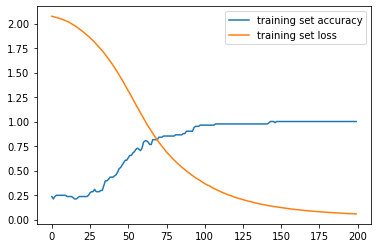

In [15]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [19]:
#chatting
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Going Merry : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : how to join
Going Merry :  you need to contact the nearest straw hats center once you have completed the pre-requisites
You : awesome
Going Merry :  Okay , Take care
